## CIFO Subpopulation Analysis_2

Let's try to make use of the logger.

Idea -> Load Data into Frame and compute statistics and graphs

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [9]:
headers = ["iteration", "elite.fitness", "elite.validation_fitness", "population_size", "selection_method", "crossover_method", "crossover_rate",
                             "mutation_method", "None", "None", "mutation_rate", "phenotypic_diversity_shift"]

In [10]:
#loading CSV of CIFO data
subpopulation = pd.read_csv("Subpopulation_analysis.csv",
                             sep= ",",
                             header = None,
                             names = headers)

sub = pd.read_csv("Subpopulation_classification.csv",
                             sep= ";",
                             header = 0)

subpopulation["Radius"] = 1
subpopulation["Pressure"] = 0.2
subpopulation = subpopulation.reset_index(drop=True)
subpopulation = subpopulation.drop(["None", "None.1"], axis=1)
subpopulation = subpopulation.join(sub)

In [11]:
subpopulation.head()

iteration  elite.fitness  elite.validation_fitness  population_size  \
0          0       0.160083                  0.145228               50   
1          1       0.177755                  0.203320               50   
2          2       0.193347                  0.203320               50   
3          3       0.193347                  0.203320               50   
4          4       0.235967                  0.215768               50   

       selection_method     crossover_method  crossover_rate mutation_method  \
0  tournament_selection  one_point_crossover             0.5   ball_mutation   
1  tournament_selection  one_point_crossover             0.5   ball_mutation   
2  tournament_selection  one_point_crossover             0.5   ball_mutation   
3  tournament_selection  one_point_crossover             0.5   ball_mutation   
4  tournament_selection  one_point_crossover             0.5   ball_mutation   

   mutation_rate  phenotypic_diversity_shift  Radius  Pressure  \
0            0.9                    0.006610       1       0.2   
1            0.9                    0.007509       1       0.2   
2            0.9                    0.000502       1       0.2   
3            0.9                   -0.003907       1       0.2   
4            0.9                    0.006628       1       0.2   

   With_Subpopulation  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

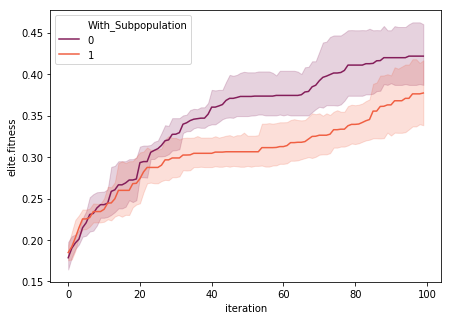

In [12]:
plt.subplots(figsize=(7,5))
sns.lineplot(x="iteration",
             y="elite.fitness",
             hue="With_Subpopulation",
             data=subpopulation,
            palette= "rocket",
            err_style="band",
            legend="full")